In [1]:
import numpy as np
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay

In [2]:
#local recurrance
patients_path = r'/content/drive/MyDrive/esophageal_patients_data (1).xlsx'
df_patients = pd.read_excel(patients_path,index_col=0)
df_fillna_0 = df_patients.fillna(0)
index1 = df_patients.loc[df_patients['local recurrence:\n1) in field   \n2) near  \n3) out field    \n4) in and out(ex: LAP)']>=1].index
index0 = df_fillna_0.loc[df_fillna_0['local recurrence:\n1) in field   \n2) near  \n3) out field    \n4) in and out(ex: LAP)'] == 0].index

In [3]:
path_parameter_dir =  r'/content/drive/Shareddrives/食道癌/rad_example_allShape結果'
list_fullpath = []
for root, dirs, files in os.walk(path_parameter_dir, topdown=False):
  for i in files :
    fullpath = os.path.join(root , i)
    if os.path.isfile(fullpath) :
      list_fullpath.append(fullpath)

In [4]:
x = []
y = []
for i in list_fullpath :
  df_parameter = pd.read_excel(i,index_col=0)
  x_feature = []
  for value in df_parameter['value']:
    try :
      value = float(value)
      x_feature.append(value)
    except :
      pass
  x.append(x_feature)
  for j in index0 :
    if str(j) in i :
      y.append([0])
  for k in index1 :
    if str(k) in i :
      y.append([1])

In [21]:
print(x)
print(y)

[[-1314.9460448726531, -3024.0, 1792.0, 7150.0, 1.0, 7150.0, 7118.583333333333, 2269.75275846458, 0.31884894117011764, 0.037140761873739846, 0.4901216226166928, 0.7884387381594835, 1.2683293597856202, 36.02776706930364, 35.34119409414458, 32.01562118716424, 27.892651361962706, 29.564657667200144, 22.361022189096225, 16.048749389095963, 0.7563430106584378, 0.5428356238638573]]
[[1]]


In [9]:
x_array = np.array(x)
y_array = np.array(y).ravel()

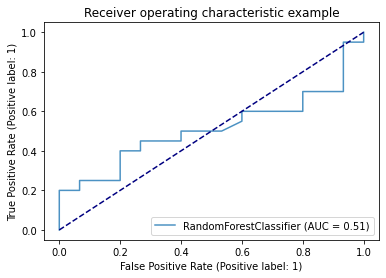

In [10]:
x_train , x_test ,y_train ,y_test = train_test_split(x_array,y_array ,test_size=0.2)
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(x_train , y_train)
rfc_disp = RocCurveDisplay.from_estimator(rfc, x_test, y_test,alpha=.8)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title('Receiver operating characteristic example')
plt.show()